In [ ]:
we will use elbow method in k_means to calculate total number of scores and will calculate Silhouette score
to check whether these are correct number scores or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
data=load_iris()
dataset=pd.DataFrame(data.data, columns=data.feature_names)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,20):
    kmean=KMeans(n_clusters=i,init='k-means++')
    kmean.fit(dataset)
    wcss.append(kmean.inertia_)

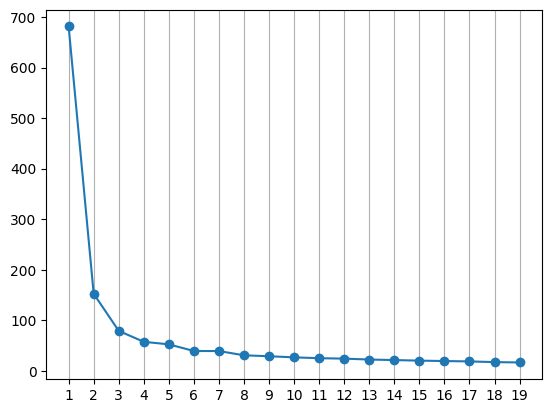

In [12]:
plt.plot([i for i in range(1,20)], wcss, marker='o')
plt.xticks([i for i in range(1,20)])
plt.grid(axis='x')
plt.show()

In [ ]:
elbow method is showing 3 number of clusters are good, now we will check whether they are good or not
via Silhouette_score_

In [16]:
km=KMeans(n_clusters=3,init='k-means++')
km.fit(dataset)


KMeans(n_clusters=3)

In [17]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [18]:
from sklearn.metrics import silhouette_score
ss=silhouette_score(dataset,km.labels_,metric='euclidean')
# km.labels_ bhi ap ko pass krna h yani is dataset pr y y clusters predict huy hn, score kia ho ga
# ab score aya 0.55, kia pta hm koi or clusters bnay yani 2 ya 4 or score ziada a jay to hm is liye loop lga kr 
# check kryn gy k kitny number of clusters pr hmara score sab s ziada ata

0.551191604619592

In [23]:
ss=[]
for i in range(2,20):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(dataset)
    predicted_clusters=km.labels_
    ss.append(silhouette_score(dataset, predicted_clusters, metric='euclidean'))

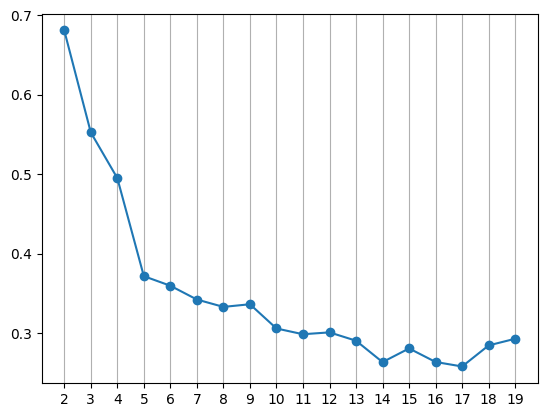

In [28]:
plt.plot([i for i in range(2,20)], ss, marker='o')
plt.xticks([i for i in range(2,20)])
plt.grid(axis='x')
plt.show()

# yani total_clusters=2 pr maximum value of silhoutte score h to yani total clusters 2 hi hony chahye